<font size="6">**Ratings for Indian Movies**</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
#Reading the File

movies= pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv')
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
#Basic information about file
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
#Basic Stats for all numeric and non-numeric variables
movies.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
#Let's Create a copy so that there would be no change in original file 
df=movies.copy()

#Let's Find if there's any duplicate available for Name column
df.duplicated(subset='Name').value_counts()

False    13838
True      1671
dtype: int64

**We have Lots of duplicates values for movie name. We will remove them so there will be no repeated data available.**

In [6]:
#Dropping all the duplicates from the column Name
df.drop_duplicates(subset='Name',inplace=True)

#Let's see if whole dataframe has any duplicates
df.duplicated().value_counts()

False    13838
dtype: int64

In [7]:
#Let's drop the first row from the dataset as there is no name available for the movie
df.drop(df.index[0])

#Resetting the index
df.set_index(np.arange(len(df)),inplace=True)

In [8]:
#Finding Null Values percentage
movies.isnull().sum().sort_values(ascending=False)/len(df)

Duration    0.597557
Rating      0.548490
Votes       0.548417
Actor 3     0.227200
Actor 2     0.172279
Genre       0.135641
Actor 1     0.116852
Year        0.038156
Director    0.037939
Name        0.000000
dtype: float64

**We can see here that Duration,Rating and Votes has more than 50% Null data. We can't simply drop the null data for them.
We will drop Null values for Year and Genre as we can't replace nulls for them.**

In [9]:
#printing Total null Values for the column Year and Genre
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 498
Null Values in Genre Column 1590


In [10]:
#Dropping null values
df.dropna(subset=['Year'],inplace=True)
df.dropna(subset=['Genre'],inplace=True)

#Checking Null Values again for confirmation. you can also skip the unnessasary stpes here and in above cell
print('Null Values in Year Column',df['Year'].isnull().sum())
print('Null Values in Genre Column',df['Genre'].isnull().sum())

Null Values in Year Column 0
Null Values in Genre Column 0


In [11]:
#checking datatypes for the variables(columns)
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

**We can see above that many numeric variables are of object type. We should change that in order to analyize the data perfectly.**

In [12]:
#We are changing the datatype for column 'Duration'
df['Duration']= df['Duration'].str.replace('min','').apply(pd.to_numeric)

#changing datatype with some string replacing
df["Votes"]=df["Votes"].replace("$5.16M", 516)
df["Votes"] = pd.to_numeric(df['Votes'].str.replace(',',''))

In [13]:
#removing the paranthesis 
df['Year'] = df['Year'].str.replace('(','').str.replace(')','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [14]:
df.isnull().sum()

Name           0
Year           0
Duration    5455
Genre          0
Rating      4716
Votes       4716
Director     426
Actor 1     1001
Actor 2     1397
Actor 3     1859
dtype: int64

**We can see that the null values for Rating,Duration and Votes can be replaced and should be replaced. But Director,Actor1,Actor2 and Actor3 cannot be replaced and the null values also won't affect that much.**

In [15]:
#replacing null values with the most common rating given to an Indian Movie
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of a movie in India
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

#replacing null values with average votes recived by a Movie
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

<font size='5'>**The Best Rate Ever Given to an Indian Movie**</font>

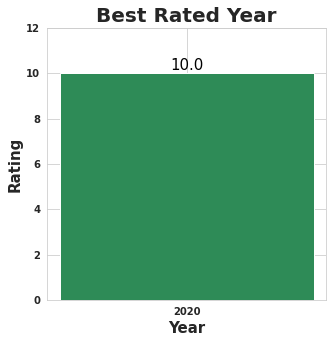

In [16]:
#sorting the Year and Rating by Rating then selecting the top one
best_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head(1)


#Plotting Bar Graph
fig=plt.figure(figsize=(5,5))
bars=plt.bar(x='Year',height='Rating',data=best_rating,color='seagreen')

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Best Rated Year",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting the labels for Bars for better visualization
for ele in bars:
    plt.text(ele.get_x()+(ele.get_width()/2),ele.get_y()+ele.get_height(),ele.get_height(),color='black',ha='center',
             va='bottom',fontsize=15)

**We can cleary see that in Year 2020 an Indian movie recieved 10.0 points on IMDB,which is quite suspicious for me though!**

<font size='6'>**Overall Top 5 Ratings Given** </font>

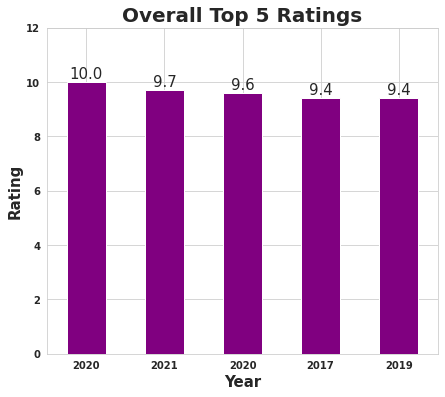

In [17]:
#sorting Values of Year and Rating by Rating then selecting top 5
top5_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head()

#Plotting Bar Graph
bars=top5_rating.plot(kind='bar',x='Year',y='Rating',color='purple',legend=None,figsize=(7,6))

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Overall Top 5 Ratings",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting Labels for bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(),'.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

<font size='6'>**Top 10 Movies According to Ratings**</font>

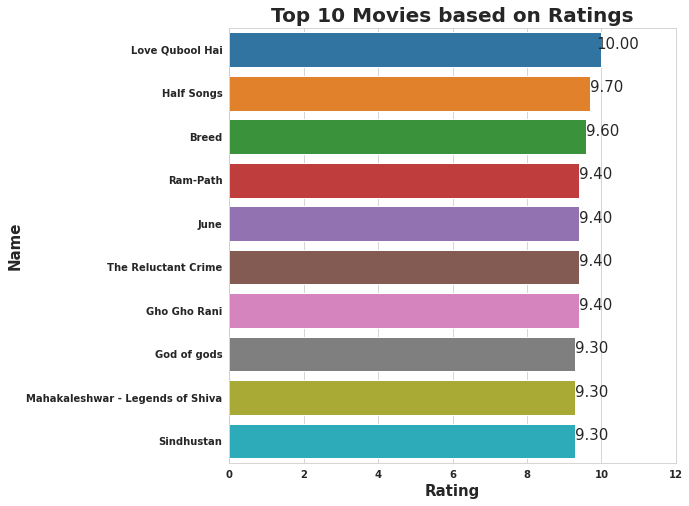

In [18]:
#intializing figure of the chart
plt.figure(figsize=(8, 8))

#Dropping the index where Year is 2022,as 2022 is in future
dframe= df.set_index('Year')
dframe.drop(index='2022',inplace=True)

#sorting Name and Rating by Rating then selecting top 10
top_movies= dframe[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

#Plotting Bar chart
plots = sns.barplot(x="Rating", y="Name", data=top_movies)
  

#Plotting Labels for bars
for bar in plots.patches:
    
    plots.annotate(format(bar.get_width(),'.2f'), 
                   (bar.get_x() + bar.get_width()+0.3, 
                    bar.get_y()+0.5), ha='center', va='center',
                   size=15, xytext=(5,10),
                   textcoords='offset points')

    
plt.xlabel("Rating",fontsize=15,fontweight='bold')
plt.ylabel("Name",fontsize=15,fontweight='bold')
plt.title("Top 10 Movies based on Ratings",fontsize=20,fontweight='bold')

plt.xticks(np.arange(0,13,2),fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

<font size='6'>**Top 10 Actors Who appears in most of the movies**</font>

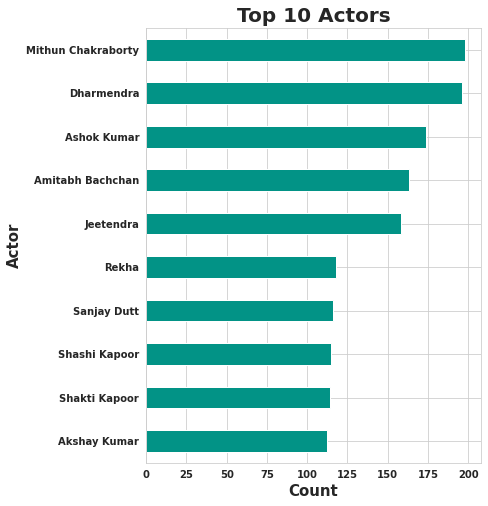

In [19]:
#Making Series for the all the columns of Actors
Actor1=df['Actor 1']
Actor2=df['Actor 2']
Actor3=df['Actor 3']

#Concatinating the series in one series
Actors = pd.concat([Actor1,Actor2,Actor3])

#sorting series by counts then selecting top 10
frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)

#Plotting Bar graph
frequent_actor.sort_values().plot(kind='barh',color='#029386',figsize=(6,8))

plt.title('Top 10 Actors',fontweight='bold',fontsize=20)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Actor',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()



**Here Mithun Chakraborty appears in most of the movies. Note that it doesn't specify if he was main protagonist/antagonist or supporting actor.**

<font size='6'>**Top 10 Genres for an Indian Movie**</font>

In [20]:
#Importing Counter to count distinct values form perticular series
from collections import Counter

#creating series for Genre column
Genre=dframe['Genre']

#initializing counter object
Genre_counter=Counter()

#splitting the values if one row contain more than two values
for response in Genre:
    Genre_counter.update(response.split(','))
    
#Printing the top 10 values with occured most of the time
print(Genre_counter.most_common(10))

#Creating List to store the Counter values
Genres=[]
frequency=[]

for items in Genre_counter.most_common(10):
    Genres.append(items[0])
    frequency.append(items[1])

    
#As Drama Appears more than twice in the List
Genres.pop(2)
frequency.pop(2)
#this will not affect the data as Drama will remain on top whether we add them or remove them 

[('Drama', 3836), ('Action', 2979), (' Drama', 2426), (' Romance', 1483), ('Comedy', 1408), (' Thriller', 777), (' Crime', 765), ('Thriller', 698), (' Family', 658), ('Romance', 653)]


2426

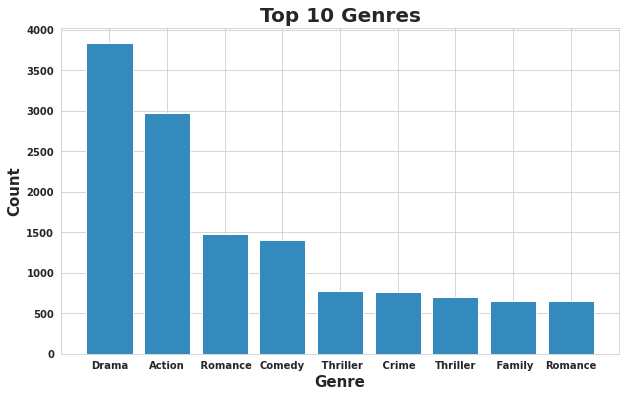

In [21]:
#Plottin bar graph
fig= plt.figure(figsize=(10,6))
plt.bar(Genres,frequency,color='#348ABD')
plt.title('Top 10 Genres',fontweight='bold',fontsize=20)
plt.xlabel('Genre',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',rotation=0)
plt.yticks(fontweight='bold')
plt.show()


**In India Most of the movies are of Drama and Action Genres.**

<font size='6'>**Top 10 Directors,Actor1,Actor2 and Actor3**</font>

In [22]:
#Creating a Funtion for plotting graphs 
def top10(column):
    global dframe
    dframe[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                            figsize=(15,6),color='#988ED5')
    
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    plt.xticks(rotation=0,fontsize=9,fontweight='bold')
    plt.yticks(fontsize=10,fontweight='bold')
    plt.show()

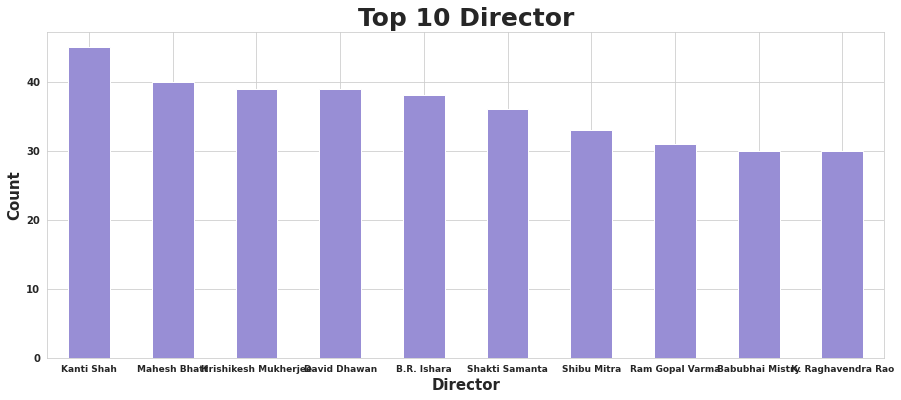

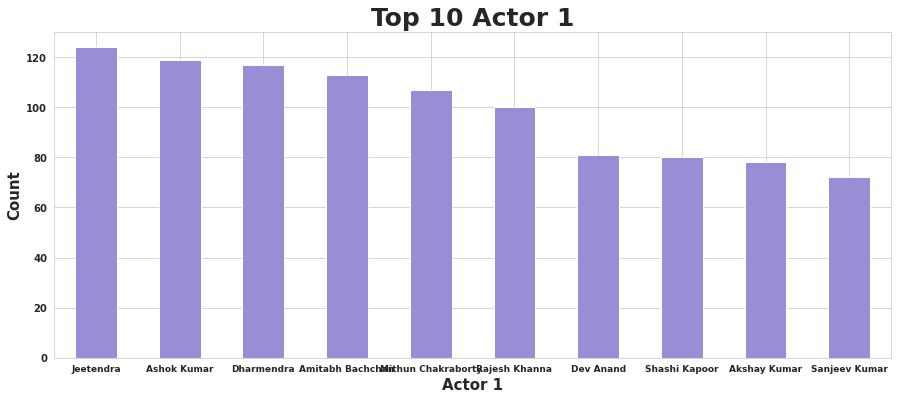

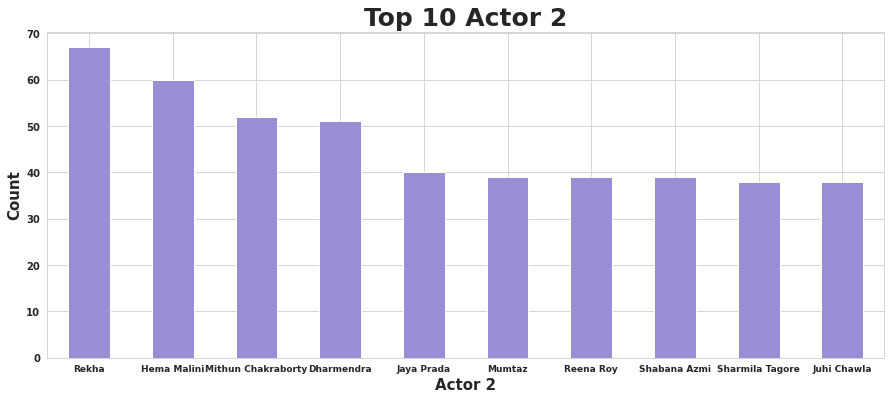

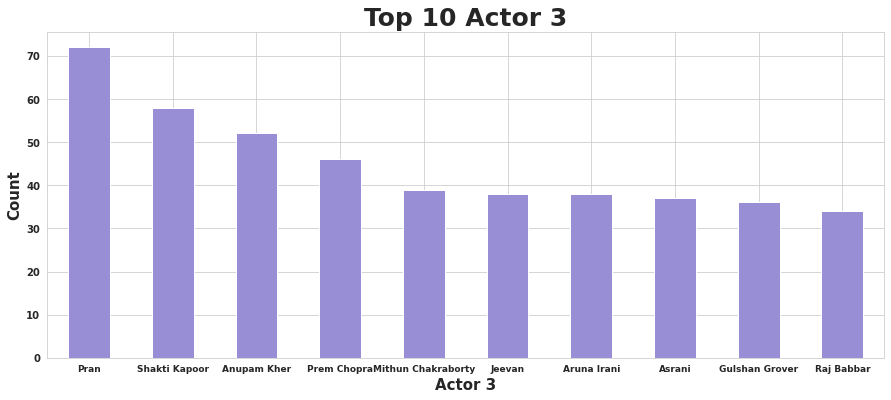

In [23]:
#Looping the columns then calling the funtion to plot graph
cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(items)

<font size='6'>**Distribution of Rating,Duration,Released_Year and Votes**</font>

In [24]:
def distribution(column):
    global dframe
    fig=plt.figure(figsize=(8,6))
    sns.displot(x=column,data=dframe,palette='gist_earth_r',bins=25)
    plt.xlabel(column,fontweight='bold',fontsize=15)
    plt.ylabel('Density',fontweight='bold',fontsize=15)
    plt.title('Distribution of {}'.format(column),fontweight='bold',fontsize=20)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.show()
    
dframe['Released_Year']= dframe.index.astype('int64')

<Figure size 576x432 with 0 Axes>

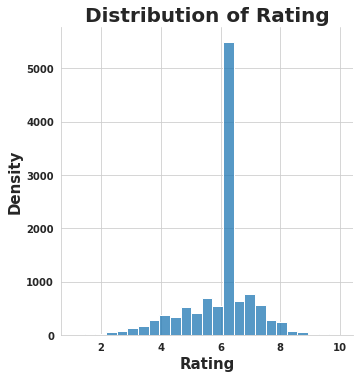

<Figure size 576x432 with 0 Axes>

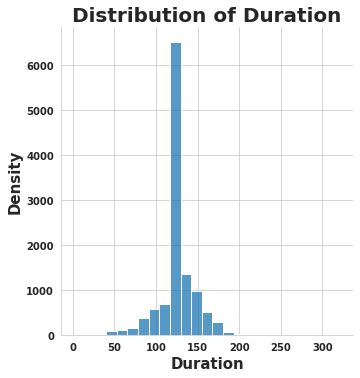

<Figure size 576x432 with 0 Axes>

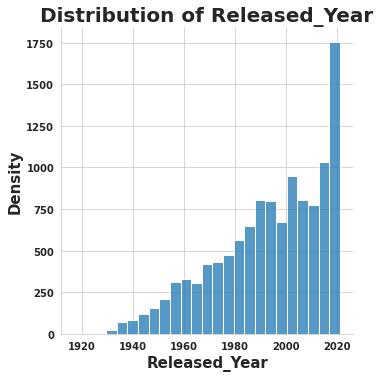

<Figure size 576x432 with 0 Axes>

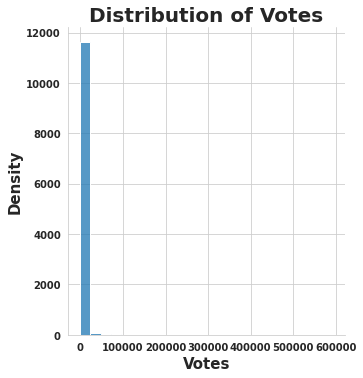

In [25]:
lis=['Rating','Duration','Released_Year','Votes']
i=0
while i< len(lis):
    distribution(lis[i])
    i+=1

<font size='6'>**Correlation between the Varibles**</font>

<AxesSubplot:>

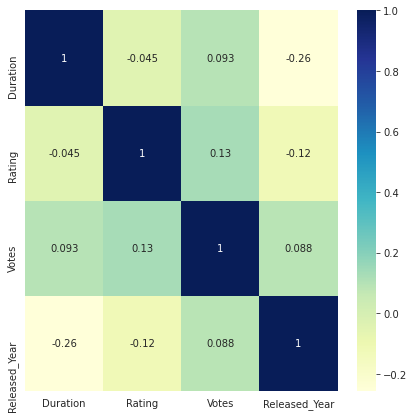

In [26]:
fig= plt.figure(figsize=(7,7))
sns.heatmap(dframe.corr(), cmap="YlGnBu", annot=True)